# NYC Subway Routes, Subway Stops, Arrest Sites

In [49]:
#!pip install sodapy
import pandas as pd
import matplotlib.pyplot as plt
from sodapy import Socrata
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

### Access year-to-date arrest data

In [95]:
client = Socrata("data.cityofnewyork.us", None)
query = client.get("uip8-fykc", limit=2000)

In [96]:
arrests = pd.DataFrame.from_records(query)
arrests.columns

Index(['arrest_key', 'arrest_date', 'pd_cd', 'pd_desc', 'ky_cd', 'ofns_desc',
       'law_code', 'law_cat_cd', 'arrest_boro', 'arrest_precinct',
       'jurisdiction_code', 'age_group', 'perp_sex', 'perp_race', 'x_coord_cd',
       'y_coord_cd', 'latitude', 'longitude', 'geocoded_column',
       ':@computed_region_f5dn_yrer', ':@computed_region_yeji_bk3q',
       ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih',
       ':@computed_region_efsh_h5xi'],
      dtype='object')

In [97]:
arrests.head()

,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,x_coord_cd,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi
0,238942621,2022-01-10T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,...,987058,203626,40.72558254,-73.98986919,"{'type': 'Point', 'coordinates': [-73.98986919...",70,4,50,5,11724
1,238980679,2022-01-11T00:00:00.000,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL 1402000,F,Q,101,...,1052353,159425,40.604001,-73.754742,"{'type': 'Point', 'coordinates': [-73.754742, ...",51,3,47,59,20529
2,239553009,2022-01-23T00:00:00.000,464,JOSTLING,230,JOSTLING,PL 1652501,M,Q,110,...,1027679,214505,40.75533648,-73.84324519,"{'type': 'Point', 'coordinates': [-73.84324519...",67,3,21,68,14510
3,239651234,2022-01-25T00:00:00.000,153,RAPE 3,104,RAPE,PL 1302503,F,K,71,...,998742,181235,40.664121282631,-73.9477648403751,"{'type': 'Point', 'coordinates': [-73.94776484...",17,2,48,44,13509
4,241524225,2022-03-03T00:00:00.000,157,RAPE 1,104,RAPE,PL 1303501,F,K,84,...,988902,192641,40.6954388081238,-73.9832253756043,"{'type': 'Point', 'coordinates': [-73.98322537...",68,2,48,54,16865


### Retrieve coordinates of arrest sites

In [98]:
longitude = pd.to_numeric(arrests['longitude'])
latitude = pd.to_numeric(arrests['latitude'])
longitude[0:5], latitude[0:5]

(0   -73.989869
 1   -73.754742
 2   -73.843245
 3   -73.947765
 4   -73.983225
 Name: longitude, dtype: float64,
 0    40.725583
 1    40.604001
 2    40.755336
 3    40.664121
 4    40.695439
 Name: latitude, dtype: float64)

### Construct geometry of arrest site data

In [99]:
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(longitude,latitude)]
geometry[0:5]

In [100]:
geo_arrests = gpd.GeoDataFrame(arrests, crs=crs, geometry=geometry)
geo_arrests.head()

C:\Users\Sydney\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,arrest_key,arrest_date,pd_cd,pd_desc,ky_cd,ofns_desc,law_code,law_cat_cd,arrest_boro,arrest_precinct,...,y_coord_cd,latitude,longitude,geocoded_column,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,:@computed_region_efsh_h5xi,geometry
0,238942621,2022-01-10T00:00:00.000,101,ASSAULT 3,344,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,...,203626,40.72558254,-73.98986919,"{'type': 'Point', 'coordinates': [-73.98986919...",70,4,50,5,11724,POINT (-73.98987 40.72558)
1,238980679,2022-01-11T00:00:00.000,244,"BURGLARY,UNCLASSIFIED,UNKNOWN",107,BURGLARY,PL 1402000,F,Q,101,...,159425,40.604001,-73.754742,"{'type': 'Point', 'coordinates': [-73.754742, ...",51,3,47,59,20529,POINT (-73.75474 40.60400)
2,239553009,2022-01-23T00:00:00.000,464,JOSTLING,230,JOSTLING,PL 1652501,M,Q,110,...,214505,40.75533648,-73.84324519,"{'type': 'Point', 'coordinates': [-73.84324519...",67,3,21,68,14510,POINT (-73.84325 40.75534)
3,239651234,2022-01-25T00:00:00.000,153,RAPE 3,104,RAPE,PL 1302503,F,K,71,...,181235,40.664121282631,-73.9477648403751,"{'type': 'Point', 'coordinates': [-73.94776484...",17,2,48,44,13509,POINT (-73.94776 40.66412)
4,241524225,2022-03-03T00:00:00.000,157,RAPE 1,104,RAPE,PL 1303501,F,K,84,...,192641,40.6954388081238,-73.9832253756043,"{'type': 'Point', 'coordinates': [-73.98322537...",68,2,48,54,16865,POINT (-73.98323 40.69544)


### Plot arrests

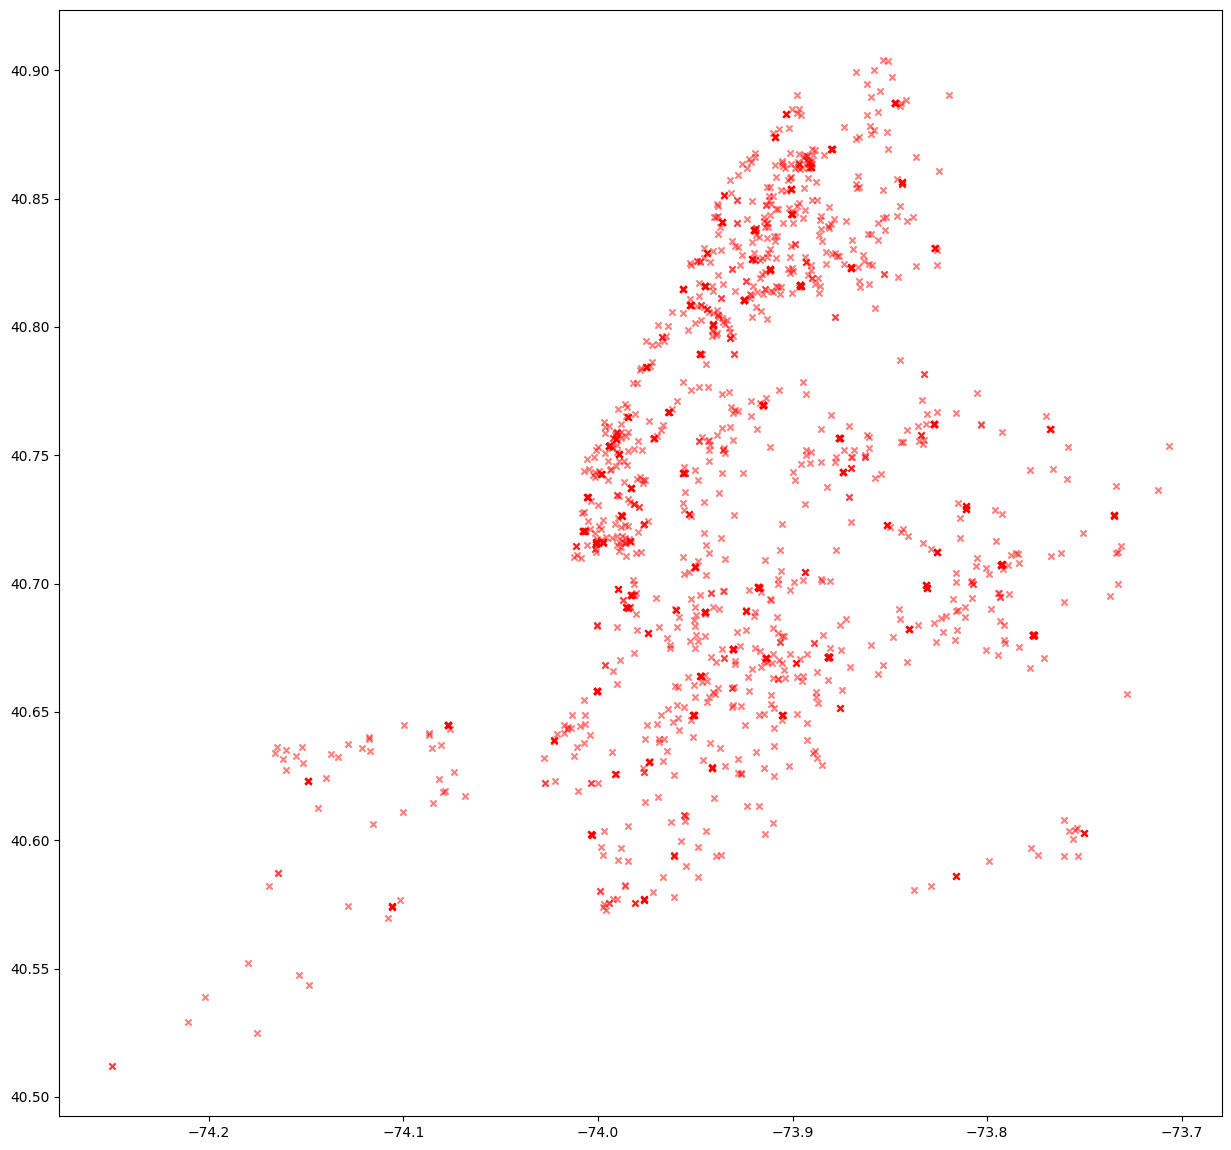

In [146]:
# Plot point geometry from arrest data
fig, ax = plt.subplots(figsize = (15, 15))
geo_arrests.plot(ax=ax, markersize=20, alpha=0.5, color='red', marker='x')
plt.show()

### Retrieve shapefile data for NYC buildings, subway stops, subway routes

In [125]:
subway_stops = gpd.read_file('./shapefile/nyu_2451_34503.shp')
subway_routes = gpd.read_file('./shapefile/nyu_2451_34758.shp')
buildings = gpd.read_file('./shapefile/geo_export_426d25b7-267f-47a3-88cc-132bf267b23d.shp')
roads = gpd.read_file('./shapefile/nyu_2451_34499.shp')

### Plot arrest sites with subway routes

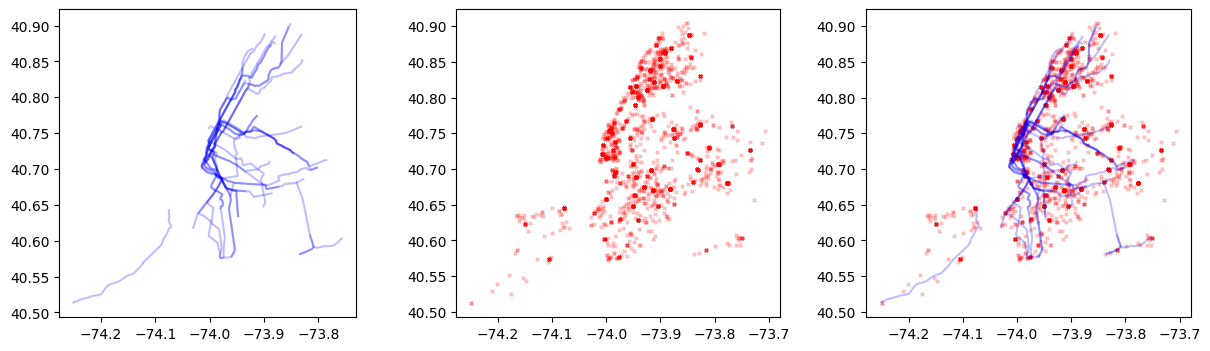

In [182]:
fig = plt.figure(figsize=(15, 4))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
subway_routes.plot(ax=ax1, alpha=0.25, markersize=5, color='blue')
geo_arrests.plot(ax=ax2, alpha=0.25, markersize=5, color='red', marker='x')
subway_routes.plot(ax=ax3, alpha=0.25, markersize=5, color='blue')
geo_arrests.plot(ax=ax3, alpha=0.25, markersize=5, color='red', marker='x')
plt.show()

### Plot arrest sites with buildings and subway routes

<AxesSubplot:>

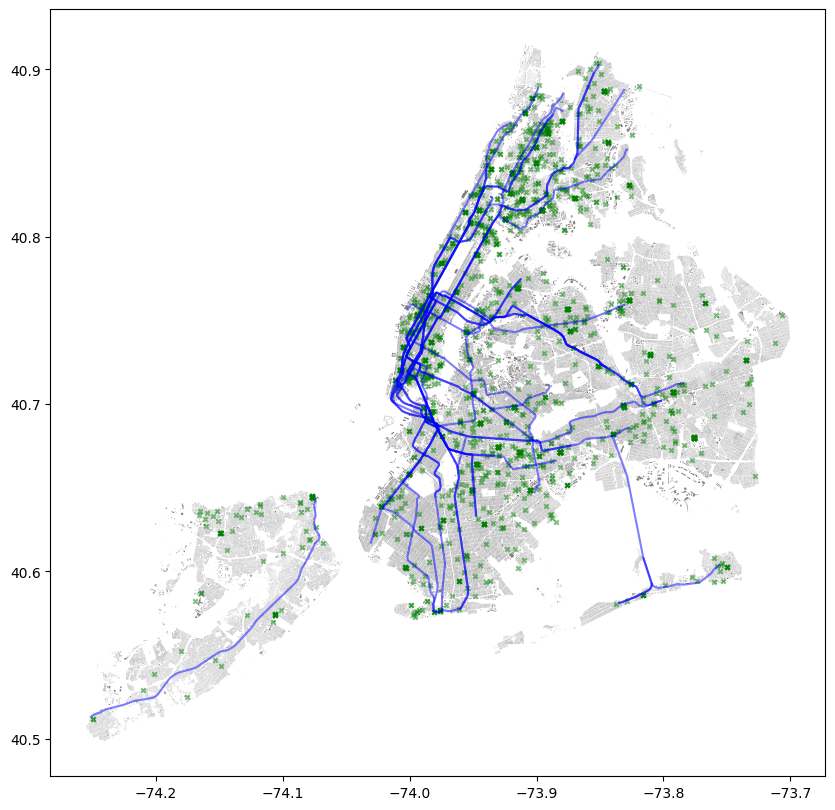

In [122]:
fig, ax = plt.subplots(figsize = (10, 10))

# Plot shapefile backgrounds
buildings.plot(ax=ax, color='grey')
subway_routes.plot(ax=ax, alpha=0.5, markersize=10, color='blue')

# Plot point geometry from arrest data
geo_arrests.plot(ax=ax, markersize=10, alpha=0.5, color='green', marker='x', label='Arrest Site')

### Plot arrest sites with buildings and subway stops

<AxesSubplot:>

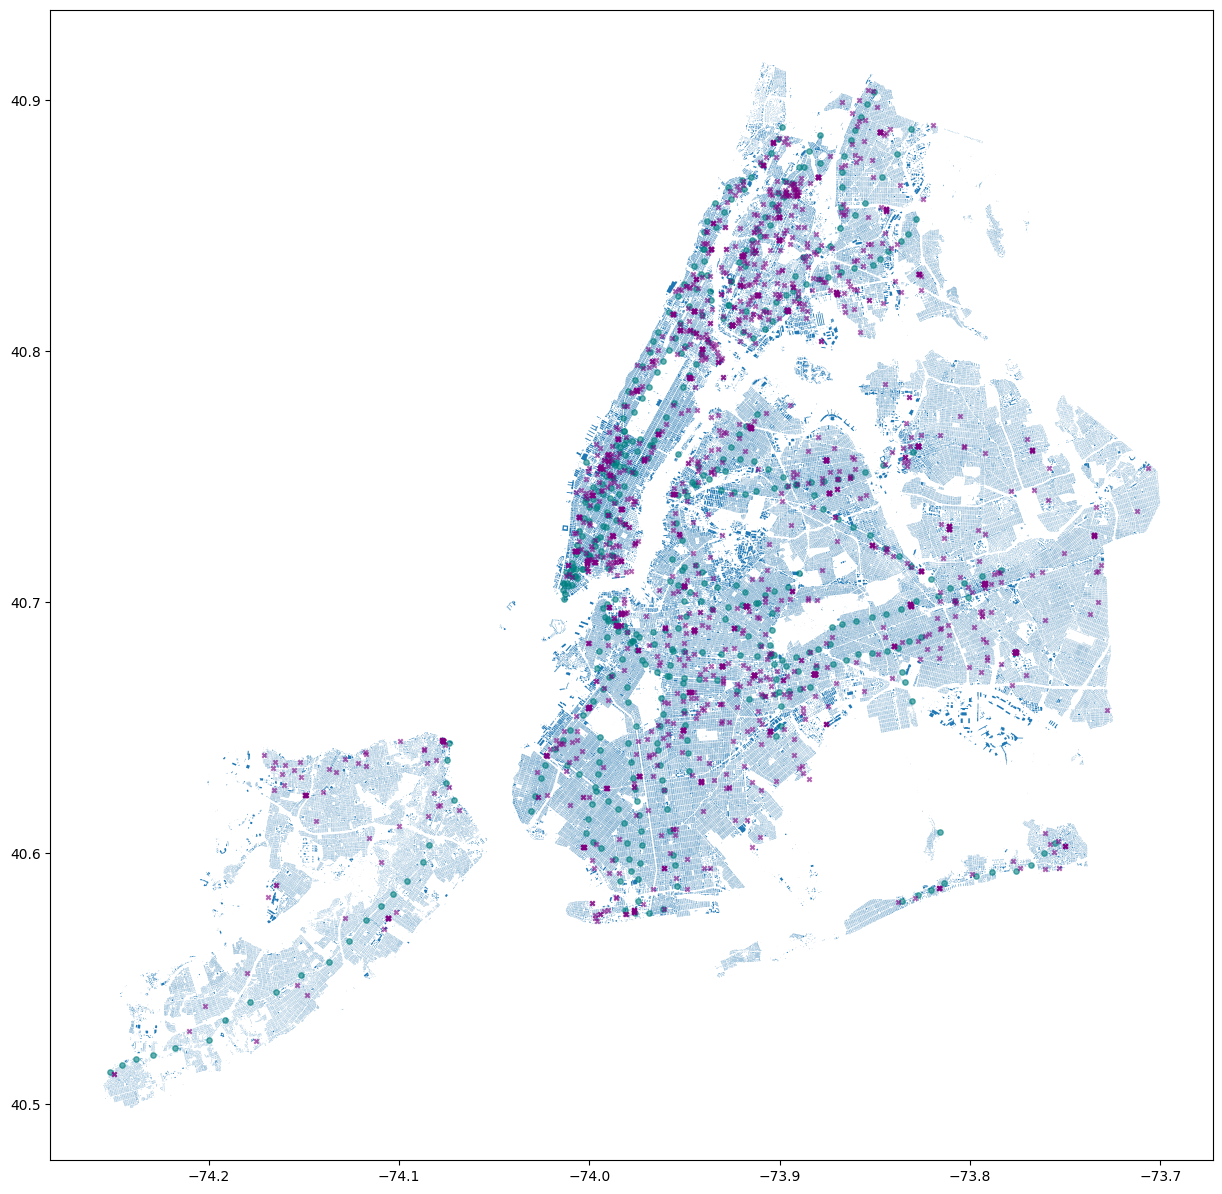

In [84]:
fig, ax = plt.subplots(figsize = (15, 15))

# Plot shapefile backgrounds
buildings.plot(ax=ax)
subway.plot(ax=ax, alpha=0.6, markersize=15, color='teal')

# Plot point geometry from arrest data
geo_arrests.plot(ax=ax, markersize=10, alpha=0.6, color='purple', marker='x', label='Arrest Site')

### Plot arrest sites with roads and subway routes

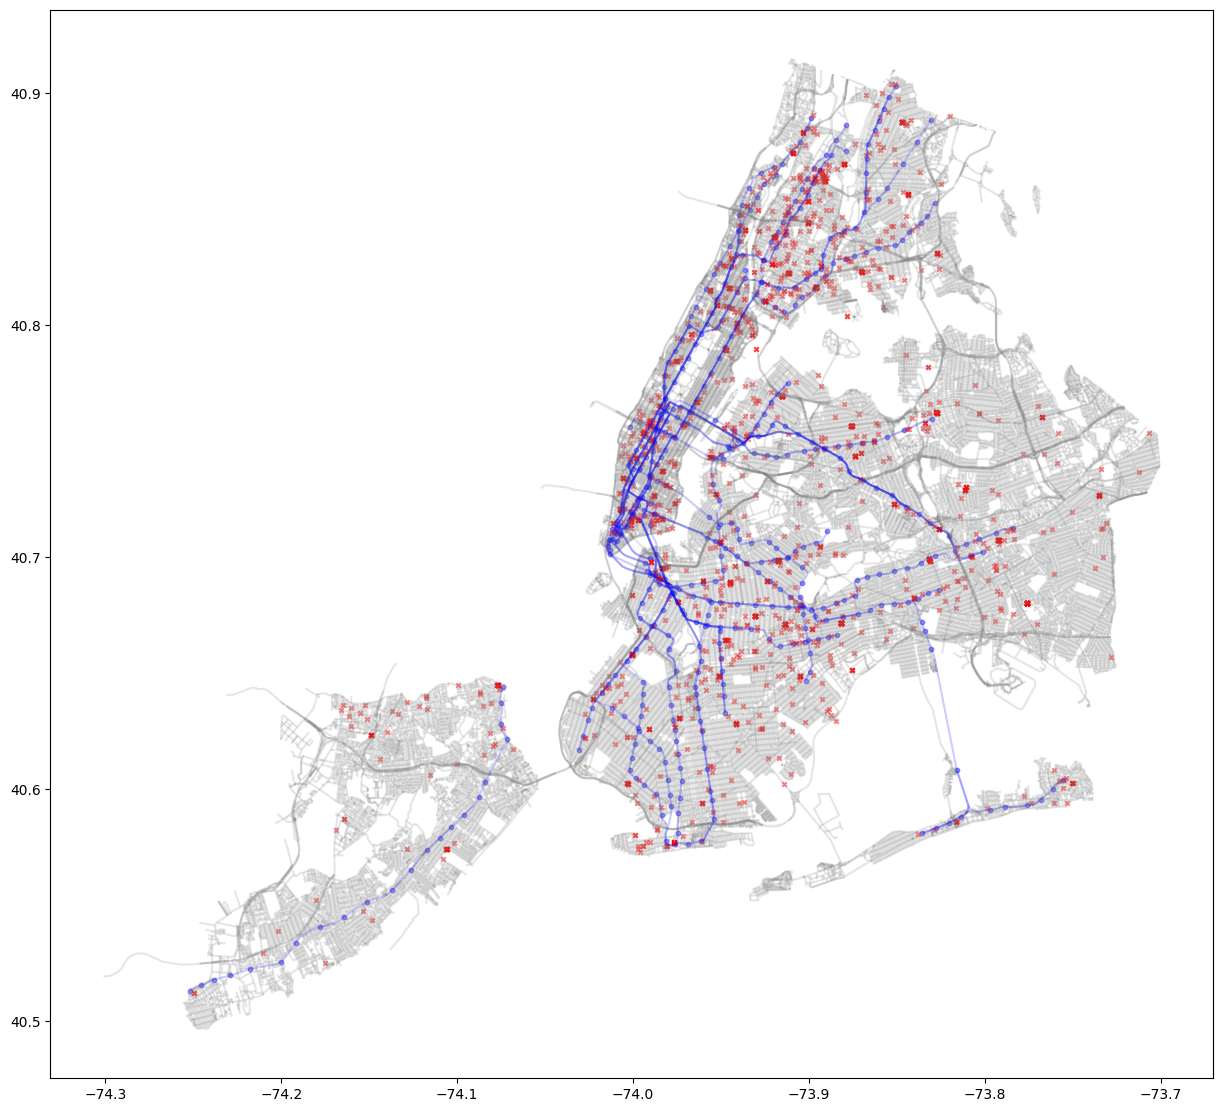

In [204]:
fig, ax = plt.subplots(figsize = (15, 15))

# Plot shapefile backgrounds
roads.plot(ax=ax, markersize=1, alpha=0.2, color='grey')
subway_routes.plot(ax=ax, alpha=0.2, markersize=5, color='blue')
subway_stops.plot(ax=ax, alpha=0.4, markersize=10, color='blue', marker='o')

# Plot point geometry from arrest data
geo_arrests.plot(ax=ax, markersize=10, alpha=0.5, color='red', marker='x', label='Arrest Site')

plt.show()